# 0. DATA CONTEXT

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy.
To study this problem, we used a dataset of 253,680 survey responses to the CDC's BRFSS2015 (Centers for Disease Control and Prevention's Behavioral Risk Factor Surveillance System of 2015). The target variable Diabetes_012 has 3 classes: 0 is for no diabetes or only during pregnancy (<100 mg/dL), 1 is for prediabetes (100-125 mg/dL), and 2 is for diabetes (>125 mg/dL). 

This dataset has 21 feature variables that can help us see which one have a bigger relation with this health condition and see if they can be used to predict that a person is at high risk of suffering this disease.

## 0.1. LEGEND

- Diabetes_012: Diabetes (0 for no diabetes, 1 for prediabetes, 2 for diabetes)
- HighBP: High Blood Pressure
- HighChol: High Cholesterol (0 for no, 1 for yes)
- CholCheck: Cholesterol Check in 5 years (0, 1)
- BMI: Body Mass Index
- Smoker: smoked at least 100 cigarettes/ 5 packs in your entire life (0, 1)
- Stroke: had a stroke (0, 1)
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) (0, 1)
- PhysActivity: physical activity in past 30 days (0, 1)
- Fruits: Consume Fruit 1 or more times per day (0, 1)
- Veggies: Consume Vegetables 1 or more times per day (0, 1)
- HvyAlcoholConsump: Heavy drinkers, adult men having more than 14 drinks per week and adult women having more than 7 drinks per week (0, 1)
- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. (0, 1)
- NoDocbcCost: time in the past 12 months when you needed to see a doctor but could not because of cost (0, 1)
- GenHlth: General Health (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)
- MentHlth: Mental Health: stress, depression, and problems with emotions for how many days during the past 30 days (scale 1-30 days)
- PhysHlth: Physical Health: physical illness and injury, for how many days during the past 30 days (scale 1-30 days)
- DiffWalk: Serious difficulty walking or climbing stairs (0, 1)
- Sex: (0 = female, 1 = male)
- Age: 13-level age category (1= 18-24, 2= 25-29, 3= 30-34, 4= 35-39, 5= 40-44, 6= 45-49, 7= 50-54, 8= 55-59, 9= 60-64, 10= 65-69, 11= 70-74, 12= 75-79, 13= 80 or older)
- Education: Education level (1 = Never attended school or only kindergarten, 2 = Elementary, 3 = Some high school, 4 = High school graduate, 5 = Some college or technical school, 6 = College graduate)
- Income: Income scale 1-8 (1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more)

# 1. NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
import sys
import logging as log
from collections import Counter
from statistics import mode
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import display, Image
from imblearn.pipeline import Pipeline
from tqdm import tqdm
from scikeras.wrappers import KerasClassifier

# 2. DATA PREPROCESSING

In [2]:
df = pd.read_csv(r'C:\Users\lucia\Desktop\python_vsc\diabetes\diabetes_db.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [3]:
df.shape

(253680, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.duplicated().sum()

23899

In [6]:
drop_duplicates = df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.shape

(229781, 22)

# 3. EXPLORATORY DATA ANALYSIS (EDA)

### Distributions

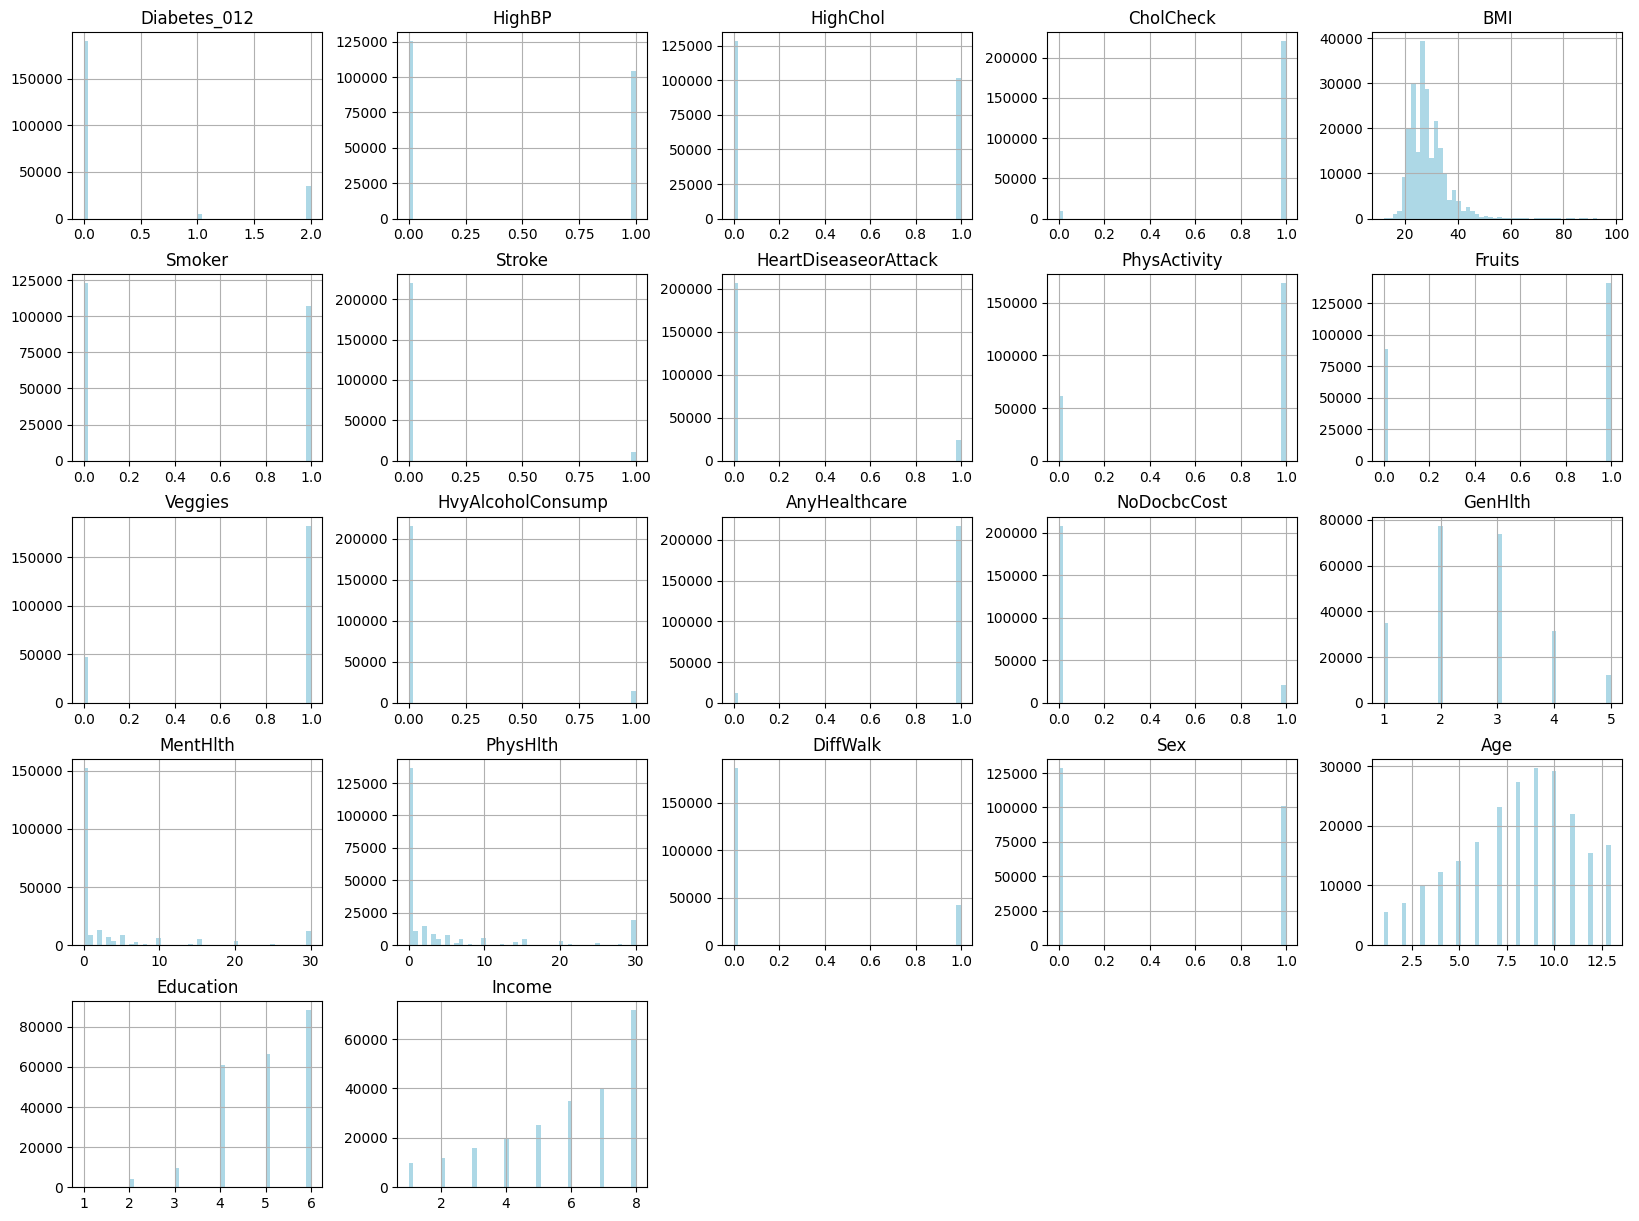

In [188]:
#Distribution of the data

df.hist(bins=50, figsize=(20, 15), color='#ADD8E6')
plt.show()

In [165]:
# People without diabetes, with prediabetes and with diabetes

diabetes_class_labels = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
df['Diabetes_012'] = df['Diabetes_012'].map(diabetes_class_labels)
counts = df['Diabetes_012'].value_counts().reindex(['No Diabetes', 'Prediabetes', 'Diabetes']).reset_index()
counts.columns = ['Diabetes_012', 'Count']
category_order = ['No Diabetes', 'Prediabetes', 'Diabetes']
color_discrete_map = {'No Diabetes': '#98FB98', 'Prediabetes': '#FFFFB3', 'Diabetes': '#FFB6C1'}

fig = px.bar(counts, x='Diabetes_012', y='Count', color='Diabetes_012', barmode='group',
             category_orders={'Diabetes_012': category_order},
             color_discrete_map=color_discrete_map,
             labels={'Diabetes_012': 'Diabetes class', 'Count': 'Count'},
             title='Diabetes class distribution',
             text='Count')
fig.update_traces(textposition='outside', textfont_size=12)
fig.show()

The data is imbalanced, with more people without diabetes than with prediabetes and diabetes.

In [189]:
#As percentage

df['Diabetes_012'] = df['Diabetes_012'].map(diabetes_class_labels)

counts = df['Diabetes_012'].value_counts().reindex(['No Diabetes', 'Prediabetes', 'Diabetes']).reset_index()
counts.columns = ['Diabetes_012', 'Count']
counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100

category_order = ['No Diabetes', 'Prediabetes', 'Diabetes']
color_discrete_map = {'No Diabetes': '#98FB98', 'Prediabetes': '#FFFFB3', 'Diabetes': '#FFB6C1'}

fig = px.bar(counts, x='Diabetes_012', y='Percentage', color='Diabetes_012', barmode='group',
             category_orders={'Diabetes_012': category_order},
             color_discrete_map=color_discrete_map,
             labels={'Diabetes_012': 'Diabetes class', 'Percentage': 'Percentage (%)'},
             title='Diabetes class distribution as percentage',
             text='Percentage')
fig.update_traces(textposition='outside', textfont_size=12)
fig.show()

Only 15% of the sample has diabetes, and 2% prediabetes.

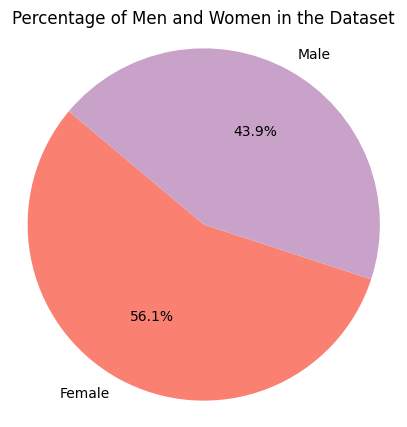

In [44]:
#Female and male distribution

df_female = df[df['Sex'] == 0]
df_male = df[df['Sex'] == 1]
total_count = len(df)
females_percentage = len(df_female) / total_count * 100
males_percentage = len(df_male) / total_count * 100
percentages = [females_percentage, males_percentage]
labels = ['Female', 'Male']

plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', colors=['#FA8072', '#C8A2C8'], startangle=140)
plt.title('Percentage of Men and Women in the Dataset')
plt.axis('equal')
plt.show()

The dataset contains more data about women than men.

In [45]:
#Diabetes class per sex

df['Diabetes_012'] = df['Diabetes_012'].replace({0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'})

# Calculate the percentage of each category for females and males
female_counts = df[df['Sex'] == 0]['Diabetes_012'].value_counts(normalize=True).mul(100).reset_index()
female_counts.columns = ['Diabetes_012', 'Percentage']
female_counts['Sex'] = 'Female'

male_counts = df[df['Sex'] == 1]['Diabetes_012'].value_counts(normalize=True).mul(100).reset_index()
male_counts.columns = ['Diabetes_012', 'Percentage']
male_counts['Sex'] = 'Male'

# Combine the counts
combined_counts = pd.concat([female_counts, male_counts])

# Create the bar graph using Plotly Express
fig = px.bar(combined_counts, x='Diabetes_012', y='Percentage', color='Sex', barmode='group',
             category_orders={'Diabetes_012': ['No Diabetes', 'Prediabetes', 'Diabetes']},
             color_discrete_map={'Female': '#FA8072', 'Male': '#C8A2C8'},
             labels={'Diabetes_012': 'Diabetes class', 'Percentage': 'Percentage', 'Sex': 'Sex'},
             title='Diabetes class distribution per sex')

fig.show()

Although the predominant class is not having diabetes, women are slightly more prone to be in this group than men. In other words, men have a higher presence of diabetes.

On the other hand, having prediabetes is more or less equally frequent for both sexes.

In [57]:
#Diabetes class per age group

diabetes_class_labels = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
df['Diabetes_012'] = df['Diabetes_012'].map(diabetes_class_labels)

age_group_labels = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80 or older'
}
df['Age_Group'] = df['Age'].map(age_group_labels)

filtered_df = df[df['Diabetes_012'].isin(['Prediabetes', 'Diabetes'])]

total_per_age_group = df['Age_Group'].value_counts().sort_index()

diabetes_per_age_group = filtered_df['Age_Group'].value_counts().sort_index()

percentage_per_age_group = (diabetes_per_age_group / total_per_age_group * 100).reset_index()
percentage_per_age_group.columns = ['Age_Group', 'Percentage']

fig = px.histogram(percentage_per_age_group, x='Age_Group', y='Percentage', nbins=13,
                   labels={'Age_Group': 'Age Group', 'Percentage': 'Percentage of People with Diabetes and Prediabetes'},
                   title='Percentage of People with Diabetes and Prediabetes per Age Group',
                   color_discrete_sequence=['#FFB6C1'])
fig.update_layout(yaxis_title='Percentage')
fig.show()

The incidence of diabetes increases with age until the group of 70-74 years old, where it starts to drop.

### Correlations

C:\Users\lucia\AppData\Local\Temp\ipykernel_13884\2147249684.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



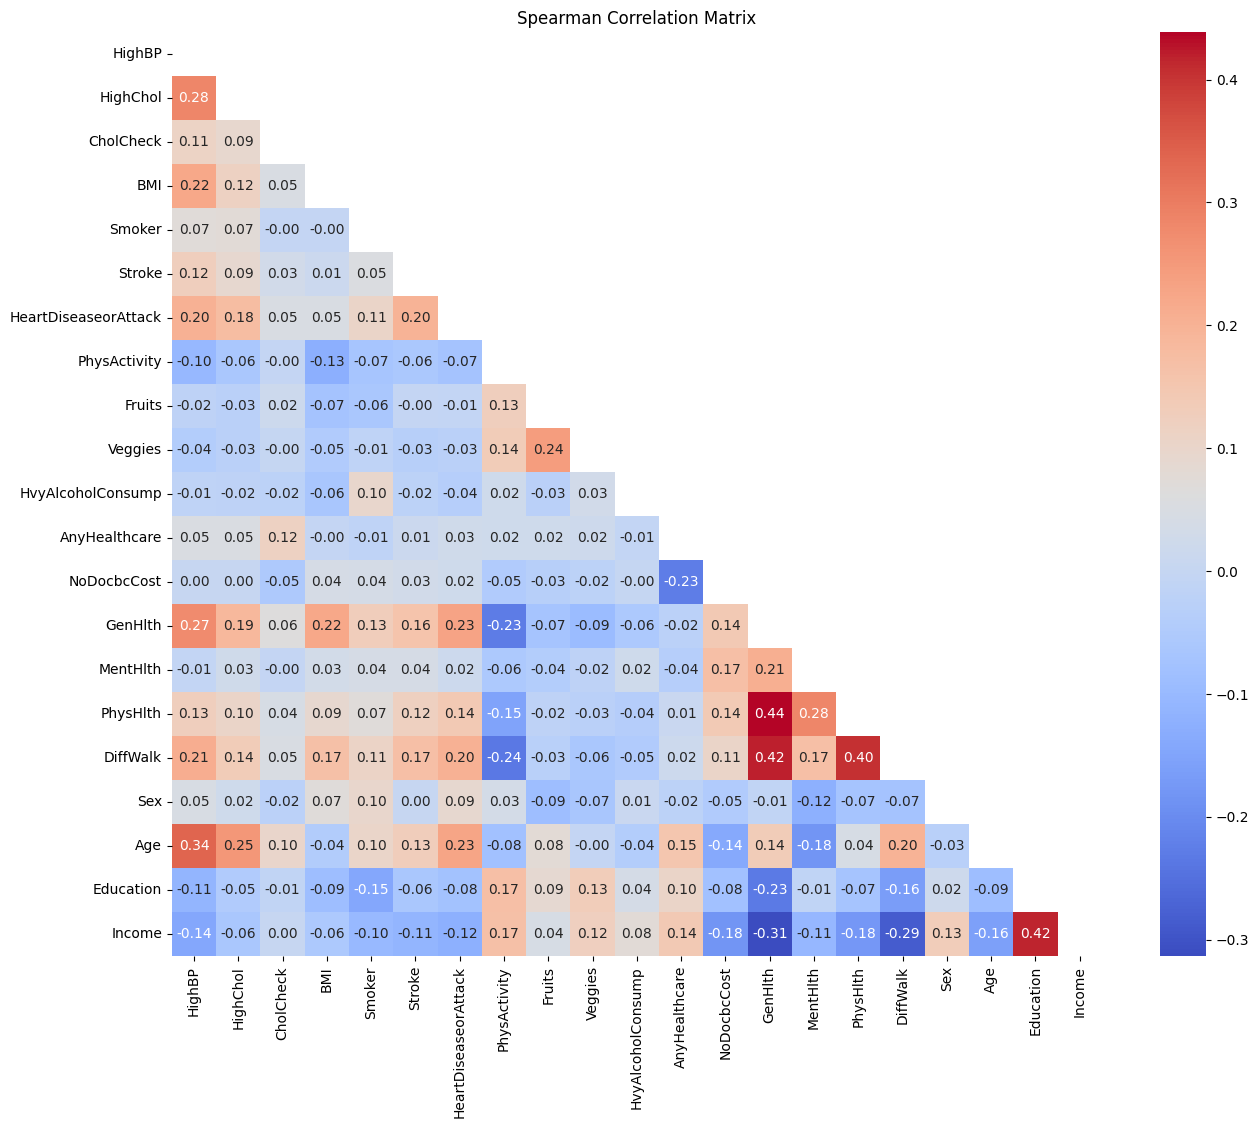

In [14]:
spearman_corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
spearman_corr_lower = spearman_corr.mask(mask)
plt.figure(figsize=(15, 12))
sns.heatmap(spearman_corr_lower, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

The variables that have a higher positive correlation with Diabetes are General Health (the lower General Health, the higher propension to Diabetes due to how the General Health variable is constructed), High Blood Pressure, BMI, Difficulties Walking, High Cholesterol, Age, having suffered a Heart Disease or Attack, Physical Health and having suffered a Stroke.
The negative correlations are low, but are related to Income and Education.

In [100]:
#Factors that influence having diabetes and prediabetes (the principal ones)

unique_values = df['Diabetes_012'].unique()

df['Diabetes_012'] = df['Diabetes_012'].astype(int)

means_df = df.groupby('Diabetes_012')[factors].mean().reset_index()

melted_means_df = means_df.melt(id_vars='Diabetes_012', value_vars=factors, var_name='Factor', value_name='Mean')

diabetes_class_labels = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
melted_means_df['Diabetes_012'] = melted_means_df['Diabetes_012'].map(diabetes_class_labels)

fig = px.bar(melted_means_df, x='Factor', y='Mean', color='Diabetes_012', barmode='group',
             title='Mean Values of Factors by Diabetes Category',
             labels={'Mean': 'Mean Value', 'Factor': 'Factor', 'Diabetes_012': 'Diabetes Category'},
             color_discrete_map={'No Diabetes': '#636EFA', 'Prediabetes': '#EF553B', 'Diabetes': '#00CC96'})
fig.show()

In [140]:
#Factors that influence having diabetes and prediabetes (every factor)

unique_values = df['Diabetes_012'].unique()

df['Diabetes_012'] = df['Diabetes_012'].astype(int)

means_df = df.groupby('Diabetes_012')[factors].mean().reset_index()

melted_means_df = means_df.melt(id_vars='Diabetes_012', value_vars=factors, var_name='Factor', value_name='Mean')

diabetes_class_labels = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
melted_means_df['Diabetes_012'] = melted_means_df['Diabetes_012'].map(diabetes_class_labels)

fig = px.bar(melted_means_df, x='Factor', y='Mean', color='Diabetes_012', barmode='group',
             title='Mean Values of Factors by Diabetes Category',
             labels={'Mean': 'Mean Value', 'Factor': 'Factor', 'Diabetes_012': 'Diabetes Category'},
             color_discrete_map={'No Diabetes': '#636EFA', 'Prediabetes': '#EF553B', 'Diabetes': '#00CC96'})
fig.show()

In [138]:
#Mean values and correlations of factors for diabetes/prediabetes group (the principal ones)

df['Diabetes_Prediabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x in [1, 2] else 0)

df_diabetes_prediabetes = df[df['Diabetes_Prediabetes'] == 1].copy()

factors = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 
           'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'Income', 'Education']

means_df = df_diabetes_prediabetes.groupby('Diabetes_Prediabetes')[factors].mean().reset_index()

melted_means_df = means_df.melt(id_vars='Diabetes_Prediabetes', value_vars=factors, var_name='Factor', value_name='Mean')

fig_means = px.bar(melted_means_df, x='Factor', y='Mean', title='Mean Values of Factors for Diabetes/Prediabetes Group',
                   labels={'Mean': 'Mean Value', 'Factor': 'Factor'},
                   color='Factor', color_discrete_sequence=px.colors.qualitative.Vivid)
fig_means.show()

anova_results = []
for factor in factors:
    f_val, p_val = stats.f_oneway(
        df[df['Diabetes_Prediabetes'] == 0][factor],
        df[df['Diabetes_Prediabetes'] == 1][factor]
    )
    anova_results.append({'Factor': factor, 'p-value': p_val})

anova_df = pd.DataFrame(anova_results)

anova_df = anova_df.sort_values(by='p-value')

fig_anova = px.bar(anova_df, x='Factor', y='p-value', title='ANOVA Test Results for Factors Influencing Diabetes/Prediabetes',
                   labels={'p-value': 'p-value', 'Factor': 'Factor'}, color='p-value', color_continuous_scale='Viridis')
print(anova_df)

correlations = df[factors].corrwith(df['Diabetes_Prediabetes'])
print("Calculated correlations:", correlations)

correlation_df = correlations.reset_index()
correlation_df.columns = ['Factor', 'Correlation']
print("Correlation DataFrame prepared:", correlation_df)

correlation_df['Correlation'] = correlation_df['Correlation'].abs()
correlation_df['Correlation'] = (correlation_df['Correlation'] / correlation_df['Correlation'].sum()) * 100
print("Normalized correlations for plotting:", correlation_df)

fig_corr = px.bar(correlation_df, x='Factor', y='Correlation', title='Correlation of Factors with Diabetes/Prediabetes',
                  labels={'Correlation': 'Percentage of Influence', 'Factor': 'Factor'}, color='Factor', color_discrete_sequence=px.colors.qualitative.Vivid)
fig_corr.show()


                  Factor  p-value
0                GenHlth      0.0
1                 HighBP      0.0
2                    BMI      0.0
3               DiffWalk      0.0
4               HighChol      0.0
5                    Age      0.0
6   HeartDiseaseorAttack      0.0
7               PhysHlth      0.0
8                 Stroke      0.0
9                 Income      0.0
10             Education      0.0
Calculated correlations: GenHlth                 0.282328
HighBP                  0.260346
BMI                     0.211155
DiffWalk                0.208126
HighChol                0.204418
Age                     0.185479
HeartDiseaseorAttack    0.167184
PhysHlth                0.158697
Stroke                  0.097685
Income                 -0.147809
Education              -0.108504
dtype: float64
Correlation DataFrame prepared:                   Factor  Correlation
0                GenHlth     0.282328
1                 HighBP     0.260346
2                    BMI     0.211155
3    

In [139]:
#Mean values and correlations of factors for diabetes/prediabetes group (every factor)

df['Diabetes_Prediabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x in [1, 2] else 0)

df_diabetes_prediabetes = df[df['Diabetes_Prediabetes'] == 1].copy()

factors = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
           'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
           'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
           'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

means_df = df_diabetes_prediabetes.groupby('Diabetes_Prediabetes')[factors].mean().reset_index()

melted_means_df = means_df.melt(id_vars='Diabetes_Prediabetes', value_vars=factors, var_name='Factor', value_name='Mean')

melted_means_df = melted_means_df.sort_values(by='Mean', ascending=False)

fig_means = px.bar(melted_means_df, x='Factor', y='Mean', title='Mean Values of Factors for Diabetes/Prediabetes Group',
                   labels={'Mean': 'Mean Value', 'Factor': 'Factor'},
                   color='Factor', color_discrete_sequence=px.colors.qualitative.Vivid)
fig_means.show()

anova_results = []
for factor in factors:
    f_val, p_val = stats.f_oneway(
        df[df['Diabetes_Prediabetes'] == 0][factor],
        df[df['Diabetes_Prediabetes'] == 1][factor]
    )
    anova_results.append({'Factor': factor, 'p-value': p_val})

anova_df = pd.DataFrame(anova_results)

anova_df = anova_df.sort_values(by='p-value')

correlations = df[factors].corrwith(df['Diabetes_Prediabetes'])
print("Calculated correlations:", correlations)

correlation_df = correlations.reset_index()
correlation_df.columns = ['Factor', 'Correlation']
print("Correlation DataFrame prepared:", correlation_df)

correlation_df['Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
print("Normalized correlations for plotting:", correlation_df)

fig_corr = px.bar(correlation_df, x='Factor', y='Correlation', title='Correlation of Factors with Diabetes/Prediabetes',
                  labels={'Correlation': 'Percentage of Influence', 'Factor': 'Factor'}, color='Factor', color_discrete_sequence=px.colors.qualitative.Vivid)
fig_corr.show()


Calculated correlations: HighBP                  0.260346
HighChol                0.204418
CholCheck               0.076190
BMI                     0.211155
Smoker                  0.046262
Stroke                  0.097685
HeartDiseaseorAttack    0.167184
PhysActivity           -0.102391
Fruits                 -0.024968
Veggies                -0.043339
HvyAlcoholConsump      -0.066111
AnyHealthcare           0.023756
NoDocbcCost             0.025940
GenHlth                 0.282328
MentHlth                0.058826
PhysHlth                0.158697
DiffWalk                0.208126
Sex                     0.030797
Age                     0.185479
Education              -0.108504
Income                 -0.147809
dtype: float64
Correlation DataFrame prepared:                   Factor  Correlation
0                 HighBP     0.260346
1               HighChol     0.204418
2              CholCheck     0.076190
3                    BMI     0.211155
4                 Smoker     0.046262
5      

# 4. A/B TESTING

### 1. Hypothesis: Smoking and diabetes


H0: Non-smokers will have the same 'Diabetes_012' classification compared to smokers

H1: Non-smokers will have a lower 'Diabetes_012' classification compared to smokers.

In [8]:
smokers = df[df['Smoker'] == 0]['Diabetes_012']
non_smokers = df[df['Smoker'] == 1]['Diabetes_012']

stat, p_value = stats.mannwhitneyu(non_smokers, smokers, alternative='less')

print(f"Mann-Whitney U Test Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the Null Hypothesis: Non-smokers have a lower 'Diabetes_012' classification compared to smokers.")
else:
    print("Cannot reject the Null Hypothesis: Non-smokers have the same 'Diabetes_012' classification compared to smokers.")

Mann-Whitney U Test Statistic: 6801306317.0, P-Value: 1.0
Cannot reject the Null Hypothesis: Non-smokers have the same 'Diabetes_012' classification compared to smokers.


### 2. Hypothesis: BMI and diabetes

H0: Individuals with a higher Body Mass Index (BMI) will have equal 'Diabetes_012' classification compared to those with a lower BMI.

H1: Individuals with a higher Body Mass Index (BMI) will have a higher 'Diabetes_012' classification compared to those with a lower BMI.

In [9]:
threshold = df['BMI'].median()
higher_BMI = df[df['BMI'] > threshold]['Diabetes_012']
lower_BMI = df[df['BMI'] <= threshold]['Diabetes_012']

stat, p_value = stats.mannwhitneyu(higher_BMI, lower_BMI, alternative='greater')

print(f"Mann-Whitney U Test Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the Null Hypothesis: Individuals with a higher BMI have a higher 'Diabetes_012' classification compared to those with a lower BMI.")
else:
    print("Cannot reject the Null Hypothesis: Individuals with a higher BMI have equal 'Diabetes_012' classification compared to those with a lower BMI.")

Mann-Whitney U Test Statistic: 7547119224.0, P-Value: 0.0
Reject the Null Hypothesis: Individuals with a higher BMI have a higher 'Diabetes_012' classification compared to those with a lower BMI.


### 3. Dietary habits and diabetes

H0: Individuals who report healthy dietary habits will have equal 'Diabetes_012' classification compared to those who report unhealthy dietary habits.

H1: Hypothesis: Individuals who report healthy dietary habits will have a lower 'Diabetes_012' classification compared to those who report unhealthy dietary habits.

In [10]:
healthy_diet = df[(df['Fruits'] == 1) & (df['Veggies'] == 1)]['Diabetes_012']
unhealthy_diet = df[(df['Fruits'] !=1) | (df['Veggies'] != 1)]['Diabetes_012']

stat, p_value = stats.mannwhitneyu(healthy_diet, unhealthy_diet, alternative='less')

print(f"Mann-Whitney U Test Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the Null Hypothesis: Individuals who report healthy dietary habits have a lower 'Diabetes_012' classification compared to those who report unhealthy dietary habits.")
else:
    print("Cannot reject the Null Hypothesis: Individuals who report healthy dietary habits have equal 'Diabetes_012' classification compared to those who report unhealthy dietary habits.")

Mann-Whitney U Test Statistic: 6371059674.0, P-Value: 8.180847105333314e-80
Reject the Null Hypothesis: Individuals who report healthy dietary habits have a lower 'Diabetes_012' classification compared to those who report unhealthy dietary habits.


### 4. General Health and diabetes

H0: People who have a good general health have an equal 'Diabetes_012' classification to those with poor general health

H1: People who have a good general health have a lower 'Diabetes_012' classification than those with poor general health

In [14]:
good_health = df[df['GenHlth'] == 1]['Diabetes_012']
poor_health = df[df['GenHlth'] != 1]['Diabetes_012']

# Perform the Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(good_health, poor_health, alternative='less')

print(f"Mann-Whitney U Test Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the Null Hypothesis: People who have good general health have a lower 'Diabetes_012' classification than those with poor general health.")
else:
    print("Cannot reject the Null Hypothesis: People who have good general health have an equal 'Diabetes_012' classification to those with poor general health.")

Mann-Whitney U Test Statistic: 2871371339.0, P-Value: 0.0
Reject the Null Hypothesis: People who have good general health have a lower 'Diabetes_012' classification than those with poor general health.


### 5. Mental Health and diabetes

H0: People who have a good mental health have an equal 'Diabetes_012' classification to those with poor mental health

H1: People who have a good mental health have a lower 'Diabetes_012' classification than those with poor mental health

In [17]:
good_mental_health = df[df['MentHlth'] == 1]['Diabetes_012']
poor_mental_health = df[df['MentHlth'] != 1]['Diabetes_012']

stat, p_value = stats.mannwhitneyu(good_mental_health, poor_mental_health, alternative='less')

print(f"Mann-Whitney U Test Statistic: {stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the Null Hypothesis: People who have good mental health have a lower 'Diabetes_012' classification than those with poor mental health.")
else:
    print("Cannot reject the Null Hypothesis: People who have good mental health have an equal 'Diabetes_012' classification to those with poor mental health.")

Mann-Whitney U Test Statistic: 861915257.0, P-Value: 9.199847007616723e-51
Reject the Null Hypothesis: People who have good mental health have a lower 'Diabetes_012' classification than those with poor mental health.


# 5. CLASSIFICATION

As we know the three diabetes conditions are imbalanced in our sample, from now on we will try to fix this with the application of techniques such as SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority classes; and cross-validation, that ensures that the model's performance is robust and not dependent on a particular subset of the data which is training the ML models. With these techniques, we proceed to the prediction process.

## 5.1. LOGISTIC REGRESSION

In [10]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test_res)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     57167
         1.0       0.03      0.29      0.06      1377
         2.0       0.36      0.58      0.44     10391

    accuracy                           0.62     68935
   macro avg       0.44      0.50      0.42     68935
weighted avg       0.84      0.62      0.70     68935



Hyperparameter adjusting:

In [27]:
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best, zero_division=1)

print(best_params)
print(accuracy_best)
print(conf_matrix_best)
print(class_report_best)

{'logistic__C': 0.01, 'logistic__solver': 'lbfgs'}
0.6240371364328715
[[36555 10211 10401]
 [  393   403   581]
 [ 1875  2456  6060]]
              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     57167
         1.0       0.03      0.29      0.06      1377
         2.0       0.36      0.58      0.44     10391

    accuracy                           0.62     68935
   macro avg       0.44      0.51      0.42     68935
weighted avg       0.84      0.62      0.70     68935



## 5.2. K-NEAREST NEIGHBORS

In [30]:
weights = 'distance'
p = 2
n_neighbors = 5

param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))
print("Best Parameters:", best_params)

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82     57167
         1.0       0.03      0.08      0.04      1377
         2.0       0.30      0.46      0.36     10391

    accuracy                           0.70     68935
   macro avg       0.40      0.43      0.41     68935
weighted avg       0.78      0.70      0.73     68935

Best Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform', 'smote__k_neighbors': 7}


Hyperparameter adjusting:

In [31]:
k_values = list(range(1, 31))
k_grid = dict(knn__n_neighbors=k_values)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(weights=weights, p=p))
])

grid = GridSearchCV(pipeline, k_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'knn__n_neighbors': 2}


In [32]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test)

best_k = 2
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', p=2)
knn_optimized.fit(X_train_res, y_train_res)

y_pred = knn_optimized.predict(X_test_res)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7709146297236528
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87     57167
         1.0       0.03      0.04      0.03      1377
         2.0       0.31      0.24      0.27     10391

    accuracy                           0.77     68935
   macro avg       0.40      0.39      0.39     68935
weighted avg       0.76      0.77      0.76     68935

[[50553  1257  5357]
 [ 1106    51   220]
 [ 7474   378  2539]]


## 5.3. NAIVE BAYES

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = np.ceil(X_train_scaled * 10).astype(int)
X_test_scaled = np.ceil(X_test_scaled * 10).astype(int)

NBC = MultinomialNB()
NBC.fit(X_train_scaled, y_train_resampled)
y_pred = NBC.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[39129  7479 10559]
 [  567   328   482]
 [ 3022  2136  5233]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78     57167
         1.0       0.03      0.24      0.06      1377
         2.0       0.32      0.50      0.39     10391

    accuracy                           0.65     68935
   macro avg       0.42      0.48      0.41     68935
weighted avg       0.81      0.65      0.71     68935



## 5.4. SUPPORT VECTOR MACHINE

Training models:   0%|          | 0/3 [00:00<?, ?it/s]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training models:  33%|███▎      | 1/3 [04:56<09:52, 296.11s/it]

Best parameters for RandomForest: {}
Best cross-validation accuracy for RandomForest: 0.6054214901209853
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training models:  67%|██████▋   | 2/3 [05:00<02:04, 124.43s/it]

Best parameters for LogisticRegression: {}
Best cross-validation accuracy for LogisticRegression: 0.6457100269823309
Fitting 2 folds for each of 1 candidates, totalling 2 fits


Training models: 100%|██████████| 3/3 [2:24:59<00:00, 2899.71s/it]

Best parameters for SVC_linear: {}
Best cross-validation accuracy for SVC_linear: 0.7002948472451911


Accuracy: 0.7058989925365015
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83     38116
         1.0       0.03      0.15      0.05       906
         2.0       0.31      0.32      0.32      6935

    accuracy                           0.71     45957
   macro avg       0.41      0.42      0.40     45957
weighted avg       0.78      0.71      0.74     45957



Plotting: 1it [16:39:26, 59966.90s/it]


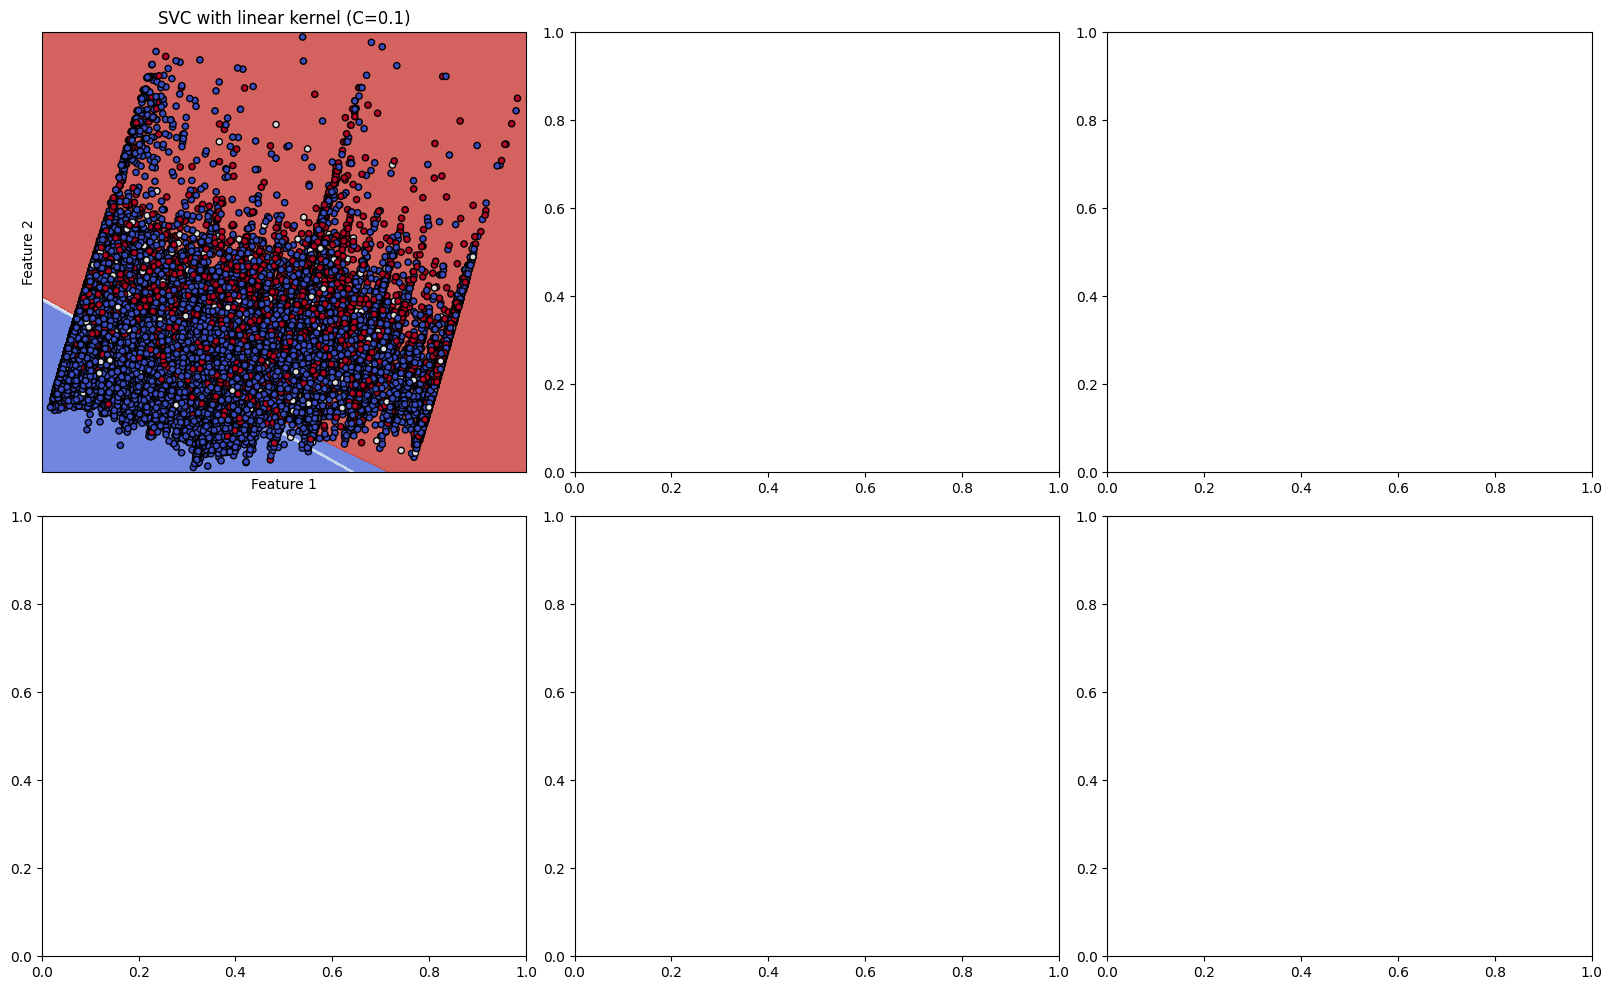

In [15]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

models = [
    ('RandomForest', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('SVC_linear', svm.SVC(kernel='linear', C=0.1))
]

pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipelines.append((name, pipeline))

for name, pipeline in tqdm(pipelines, desc="Training models"):
    grid = GridSearchCV(pipeline, param_grid={}, cv=2, scoring='accuracy', return_train_score=False, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid.best_score_}")

best_model = max(pipelines, key=lambda item: GridSearchCV(item[1], param_grid={}, cv=2, scoring='accuracy', n_jobs=-1).fit(X_train, y_train).best_score_)[1]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

titles = [
    'SVC with linear kernel (C=0.1)'
]

fig, sub = plt.subplots(2, 3, figsize=(20, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in tqdm(zip([model for name, model in models if 'SVC' in name], titles, sub.flatten()), desc="Plotting"):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 5.5. DECISION TREES

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(clf, X_train_res, y_train_res, cv=5)

clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Cross-Validation Scores: [0.70389585 0.89863962 0.90034619 0.90008289 0.90089132]
Mean Cross-Validation Score: 0.8607711753694958
Accuracy: 0.7660044150110376
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     42795
         1.0       0.03      0.03      0.03       944
         2.0       0.29      0.33      0.31      6997

    accuracy                           0.77     50736
   macro avg       0.40      0.40      0.40     50736
weighted avg       0.78      0.77      0.77     50736



## 5.6. RANDOM FORESTS

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

clf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(clf, X_train_res, y_train_res, cv=5)

clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['0', '1', '2'])

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Cross-Validation Scores: [0.7023063  0.97284119 0.97162221 0.9715247  0.97176822]
Mean Cross-Validation Score: 0.9180125247807627
Accuracy: 0.838792967518133
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     42795
           1       0.00      0.00      0.00       944
           2       0.46      0.24      0.31      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.40      0.41     50736
weighted avg       0.80      0.84      0.81     50736



## 5.7. RECEIVER OPERATING CHARACTERISTIC

Confusion Matrix:
[[51136    58  2284]
 [ 1029     0   150]
 [ 6733    14  2016]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     53478
         1.0       0.00      0.00      0.00      1179
         2.0       0.45      0.23      0.31      8763

    accuracy                           0.84     63420
   macro avg       0.44      0.40      0.41     63420
weighted avg       0.79      0.84      0.81     63420



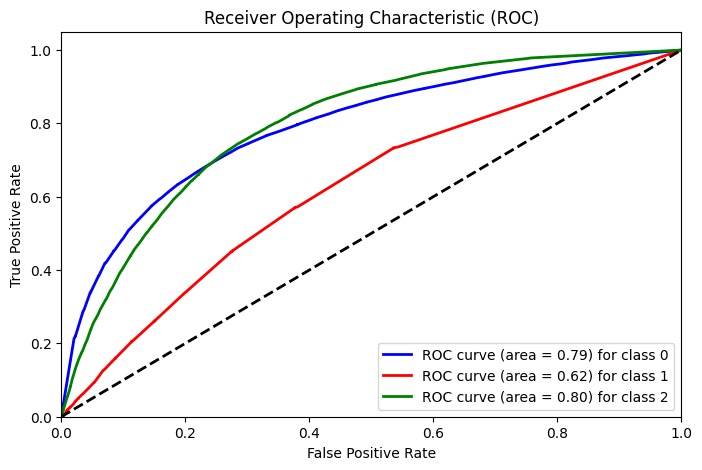

Cross-Validation Scores: [0.70212722 0.97212254 0.97233058 0.97175846 0.9724242 ]
Mean Cross-Validation Score: 0.9181525979091901


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5)

model.fit(X_train_res, y_train_res)

y_pred = model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[:, i], pos_label=model.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 5))
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], model.classes_[i]))

y_pred_labels = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_labels)
print("\nClassification Report:")
print(class_report)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

# 6. NEURAL NETWORKS: CLASSIFYING DIABETES PRESENCE IN TERMS OF OTHER HEALTH FACTORS

To finish, we propose a neural network to predict diabetes on people. It was created using a sequential model with an input layer with neurons equal to the number of features of the dataset; three hidden layers with 64, 32 and 16 neurons respectively, activated with ReLU; and one output layer with neurons equal to the number of classes in the target variable, activated with softmax.
The loss function is the categorical cross-entropy and the optimizer used for training is Adam.
It also includes a feature of an Earlystopping, that decides which number of epochs is the optimal to prevent overfitting.

On the other hand, related to the cross-validation part, we used Keras and scikit-learn, and a five-level stratification tool.

Epoch 1/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.5840 - loss: 0.8572 - val_accuracy: 0.6566 - val_loss: 0.7181
Epoch 2/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.6669 - loss: 0.6970 - val_accuracy: 0.6760 - val_loss: 0.6785
Epoch 3/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.6780 - loss: 0.6737 - val_accuracy: 0.6826 - val_loss: 0.6659
Epoch 4/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.6862 - loss: 0.6598 - val_accuracy: 0.6876 - val_loss: 0.6594
Epoch 5/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.6912 - loss: 0.6496 - val_accuracy: 0.6927 - val_loss: 0.6485
Epoch 6/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.6989 - loss: 0.6389 - val_accuracy: 0.7003 - val_loss: 0.6372
Epoch 7/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7025 - loss: 0.6316 - val_accuracy: 0.7071 - val_loss: 0.6269
Epoch 8/100
13364/13364 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - ac

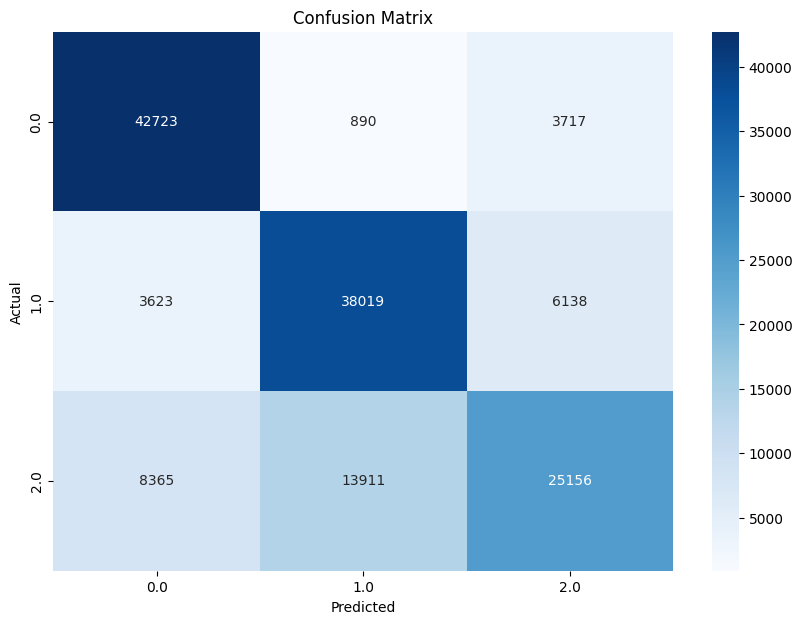

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84     47330
         1.0       0.72      0.80      0.76     47780
         2.0       0.72      0.53      0.61     47432

    accuracy                           0.74    142542
   macro avg       0.74      0.74      0.73    142542
weighted avg       0.74      0.74      0.73    142542



Cross-validation: 5it [2:32:47, 1833.52s/it]


Cross-Validation Scores: [0.7088211307253164, 0.7223610709180676, 0.714345847254742, 0.707233870897021, 0.7276665526645796]
Mean Cross-Validation Score: 0.7160856944919454


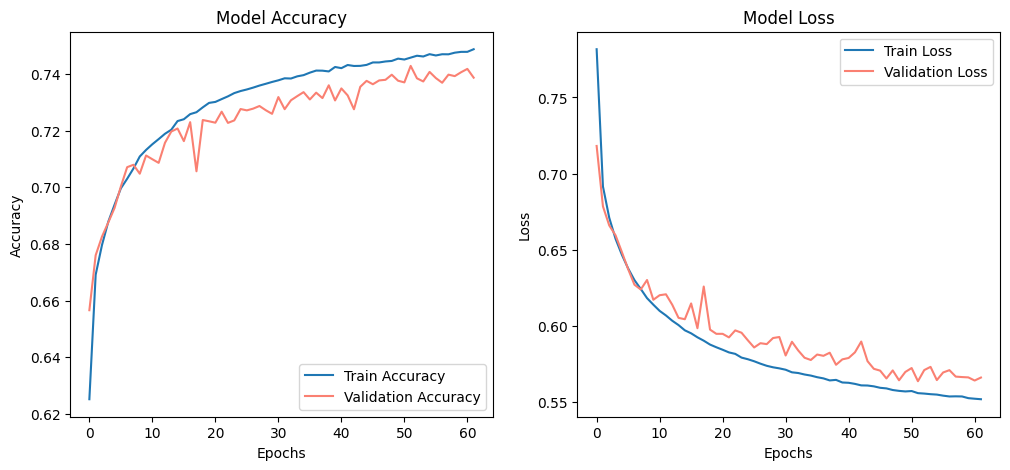

In [28]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

y_resampled = to_categorical(y_resampled)

X_resampled_np = np.array(X_resampled)
y_resampled_np = np.array(y_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_np, y_resampled_np, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_.astype(str))
print("Classification Report:")
print(class_report)

keras_clf = KerasClassifier(model=create_model, epochs=100, batch_size=32, verbose=0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, test_idx in tqdm(cv.split(X_resampled_np, y_resampled_np.argmax(axis=1)), desc="Cross-validation"):
    X_train_cv, X_test_cv = X_resampled_np[train_idx], X_resampled_np[test_idx]
    y_train_cv, y_test_cv = y_resampled_np[train_idx], y_resampled_np[test_idx]
    
    keras_clf.fit(X_train_cv, y_train_cv)
    
    score = keras_clf.score(X_test_cv, y_test_cv)
    cv_scores.append(score)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='salmon')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='salmon')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

Out of all the ML and Neural Network models, we personally choose the Neural Network, since, although it does not have the better global accuracy, it is highly more precise in predicting prediabetes and diabetes in comparison with the rest of the models.

In conclusion:
- The sample we have is imbalanced, with more data about people without diabetes than prediabetes and diabetes.
- There is not a big difference in the incidence per sexes when studying diabetes presence, although it is slightly more present in men.
- Having diabetes or prediabetes increases with age.
- Out of the 21 variables in the dataset, the ones that have a higher correlation with Diabetes are General Health, High Blood Pressure, BMI, Difficulties Walking, High Cholesterol, Age, having suffered a Heart Disease or Attack, Physical Health and having suffered a Stroke. Income and Education are also involved.
- The Neural Network created is chosen as the best method to predict suffering from this disease.
- Finally, as a few recommendations, it is important to try to maintain a proper BMI according to the person's characteristics, having good dietary habits (e.g. eating more fruits and vegetables), and taking care of ourselves at a general but also at a mental level can help us reduce the chances of having prediabetes or diabetes.